In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#### Read in the data

In [2]:
train_views = pd.read_csv("train_views.csv")
test_views = pd.read_csv("test_views.csv")

In [3]:
train_stream = pd.read_csv("train_stream.csv")
test_stream = pd.read_csv("test_stream.csv")

#### Define features and label

In [4]:
views_features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
           'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
           'Duration_ms', 'Likes', 'Comments']
stream_features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
           'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
           'Duration_ms', 'Likes', 'Comments']

In [5]:
views_label = ['isPopularViews']
stream_label = ['isPopularStream']

#### Initialize MLP architecture with 4 hidden layer of 325 total neurons

In [20]:
views_mlp = MLPClassifier(hidden_layer_sizes=(150, 100, 50, 25), activation='relu', solver='adam', alpha=0.0001, batch_size=32,
                          learning_rate='adaptive', learning_rate_init=0.01, max_iter=500, random_state=42,
                          validation_fraction=0.2, early_stopping=True)

In [21]:
stream_mlp = MLPClassifier(hidden_layer_sizes=(150, 100, 50, 25), activation='relu', solver='adam', alpha=0.0001, batch_size=32,
                           learning_rate='adaptive', learning_rate_init=0.01, max_iter=500, random_state=42,
                           validation_fraction=0.2, early_stopping=True)

#### Train the MLPs

In [22]:
views_mlp.fit(train_views[views_features], train_views[views_label].values.ravel())

C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

MLPClassifier(batch_size=32, early_stopping=True,
              hidden_layer_sizes=(150, 100, 50, 25), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=500, random_state=42,
              validation_fraction=0.2)

In [23]:
stream_mlp.fit(train_stream[stream_features], train_stream[stream_label].values.ravel())

C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\davem\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid featur

MLPClassifier(batch_size=32, early_stopping=True,
              hidden_layer_sizes=(150, 100, 50, 25), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=500, random_state=42,
              validation_fraction=0.2)

#### Make predictions on the test data

In [24]:
views_pred = views_mlp.predict(test_views[views_features])

In [25]:
stream_pred = stream_mlp.predict(test_stream[stream_features])

#### Evaluate the performance of the MLPs

In [26]:
views_acc = accuracy_score(test_views[views_label], views_pred)
print("Views MLP accuracy score: {:.2f}".format(views_acc))

Views MLP accuracy score: 0.88


In [27]:
stream_acc = accuracy_score(test_stream[stream_label], stream_pred)
print("Views MLP accuracy score: {:.2f}".format(stream_acc))

Views MLP accuracy score: 0.74


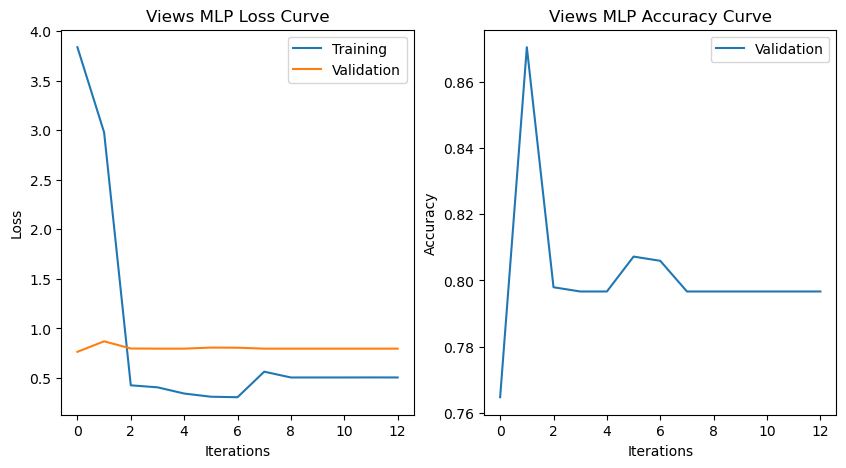

In [33]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot (loss curve)
axs[0].plot(views_mlp.loss_curve_, label='Training')
axs[0].plot(views_mlp.validation_scores_, label='Validation')
axs[0].set_title('Views MLP Loss Curve')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the second subplot (accuracy curve)
axs[1].plot(views_mlp.validation_scores_, label='Validation')
axs[1].set_title('Views MLP Accuracy Curve')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Show the plot
plt.show()


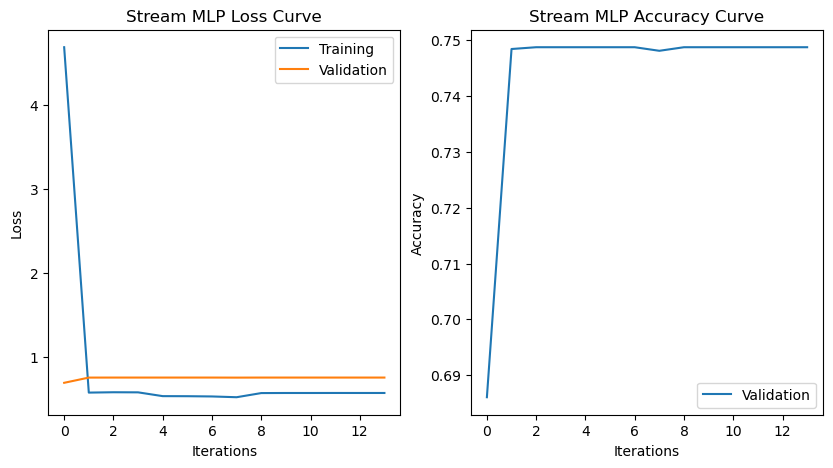

In [34]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first subplot (loss curve)
axs[0].plot(stream_mlp.loss_curve_, label='Training')
axs[0].plot(stream_mlp.validation_scores_, label='Validation')
axs[0].set_title('Stream MLP Loss Curve')
axs[0].set_xlabel('Iterations')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot the second subplot (accuracy curve)
axs[1].plot(stream_mlp.validation_scores_, label='Validation')
axs[1].set_title('Stream MLP Accuracy Curve')
axs[1].set_xlabel('Iterations')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# Show the plot
plt.show()